In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from skimage import data
from skimage import img_as_float
from sklearn.cluster import KMeans

# Image Compression with K-Means Clustering

A 24-bit RGB image uses $256 = 2^8$ possible values per colour-channel (Red/Green/Blue),
so that, each pixel in the image requires $3\times 8 = 24$ bits of storage.
We would like to approximate such an image with an $n$-bit RGB image using K-Means clustering, where $n < 24$.

The following box loads an image from the **skimage** package and stores it in the variable **<font color=red>image</font>**.<br>

In [2]:
image = data.astronaut()

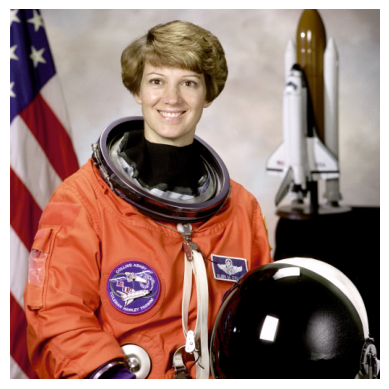

In [3]:
# Converting the values to float, and presenting the image.

image = img_as_float(image)
plt.imshow(image)
plt.axis('off')
plt.tight_layout;

We use **KMeans** (imported from sklearn.cluster) to apply the K-means clustering algorithm to the loaded image.<br>
We set the number of clusters to be $2^\text{nbits}$, where **nbits** is number of bits used to store each pixel. <br>
The process is repeated for $\text{nbits} = 1,2,6$. The image is a matrix of 512x512 RGB values, which we have to turn into a vector of 262,144 values.

In [4]:
image_vector = np.reshape(image, (-1,3)) # converting the image matrix into a vector with 3 colour channels

In [5]:
# Applying the K-means algorithm to the image with 2 clusters. Each cluster corresponds to a colour
kmeans_1 = KMeans(n_clusters=(2**1)).fit(image_vector)

# The centers and the labels are stored in separate variables. The numbers in the variables' names correspond to the number
# of bits used to store each pixel
centers_1 = kmeans_1.cluster_centers_
labels_1 = kmeans_1.labels_

C:\Users\yzdal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# Applying the K-means algorithm to the image with 4 clusters. Now we have 4 colours
kmeans_2 = KMeans(n_clusters=(2**2)).fit(image_vector)

centers_2 = kmeans_2.cluster_centers_
labels_2 = kmeans_2.labels_

C:\Users\yzdal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
kmeans_6 = KMeans(n_clusters=(2**6)).fit(image_vector)
centers_6 = kmeans_6.cluster_centers_
labels_6 = kmeans_6.labels_

C:\Users\yzdal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now we create a new image, where each pixel value is replaced by its nearest K-means center.<br>

In [8]:
def compress_image(labels, centers, image_matrix):
    
    """This function takes an array of labels, an array of centers and an image in matrix form and returns a compressed
    version of the image."""
    
    rows_of_centers_list = [] # Initialise an empty list to store the centres that will replace the original pixel values
    
    for i in labels:
    # Iterate through the array of pixel labels and append the rows_of_centers_list with the centre that corresponds
    # to the label
        rows_of_centers_list.append(centers[i])
        
    new_image = np.reshape(np.array(rows_of_centers_list), image_matrix.shape) # Convert the image vector back to a matrix
    
    return new_image

image_comp_1 = compress_image(labels_1, centers_1, image)
image_comp_2 = compress_image(labels_2, centers_2, image)
image_comp_6 = compress_image(labels_6, centers_6, image)

Next, the compressed images are displayed.

Text(0.5, 1.0, '6 bit')

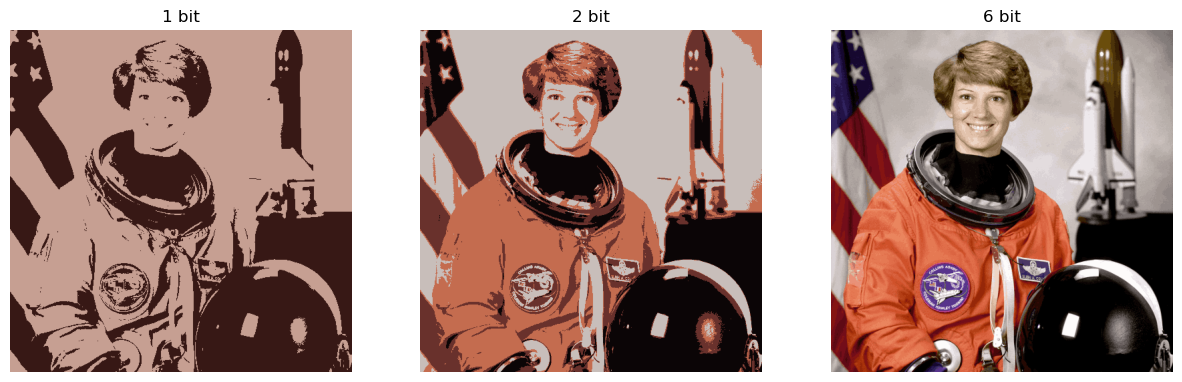

In [10]:
# Plotting the three results.

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_comp_1)
plt.axis('off')
plt.title('1 bit')

plt.subplot(1, 3, 2)
plt.imshow(image_comp_2)  
plt.axis('off')
plt.title('2 bit')

plt.subplot(1, 3, 3)
plt.imshow(image_comp_6)  
plt.axis('off')
plt.title('6 bit')

We can see that the quality of the compressed image increases as the number of bits increases. The 1-bit image produces two colour variations compared to 64 colour variations for the 6-bit image.